In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement et Exploration Initiale

In [3]:
try:
    file_path = "C:\\Users\\loicp\\Documents\\Projets_Jupyter\\Bank_transactions\\bank_transactions_data_2.csv"
    df = pd.read_csv(file_path)
    print("Fichier chargé avec succès.")
except FileNotFoundError:
    print("Erreur : Fichier non trouvé. Vérifiez le chemin d'accès.")
except Exception as e:
    print(f"Une erreur est survenue lors du chargement : {e}")

Fichier chargé avec succès.


In [5]:
# Informations sur les colonnes et types de données
df.info()


# Vérification si des colonnes comme TransactionDate doivent etre converties
if 'TransactionDate' in df.columns:
    df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
    print("TransactionDate converti en format datetime.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [7]:
df.isnull().sum()

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

In [9]:
print("Aperçu des premières lignes du dataset :")
df.head()

Aperçu des premières lignes du dataset :


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [11]:
print("Echantillon aléatoire du dataset :")
df.sample(5)

Echantillon aléatoire du dataset :


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
1659,TX001660,AC00456,53.79,2023-12-05 16:01:44,Credit,Philadelphia,D000199,101.223.82.253,M072,ATM,54,Engineer,137,3,6229.36,2024-11-04 08:07:47
808,TX000809,AC00422,80.24,2023-05-19 17:28:42,Credit,New York,D000604,190.92.63.219,M016,Branch,53,Doctor,58,1,8012.81,2024-11-04 08:12:13
1742,TX001743,AC00053,117.66,2023-08-03 18:19:53,Credit,Memphis,D000047,34.125.226.63,M014,Branch,39,Doctor,126,1,6794.17,2024-11-04 08:07:55
571,TX000572,AC00434,41.49,2023-04-24 16:47:20,Debit,Albuquerque,D000422,32.71.250.58,M027,Online,24,Student,13,1,928.33,2024-11-04 08:12:03
2126,TX002127,AC00242,84.91,2023-10-16 18:38:15,Debit,Raleigh,D000667,141.201.46.191,M034,Online,18,Student,68,1,1671.86,2024-11-04 08:06:59


In [13]:
# Vérification des doublons 
duplicates = df[df.duplicated()]
print(f"le nombre de doublons est : {duplicates.shape[0]}")

le nombre de doublons est : 0


In [15]:
print(f"le dataset contient {df.shape[0]} lignes et {df.shape[1]} colonnes")

le dataset contient 2512 lignes et 16 colonnes


##### Examinons la distribution des montants de transaction

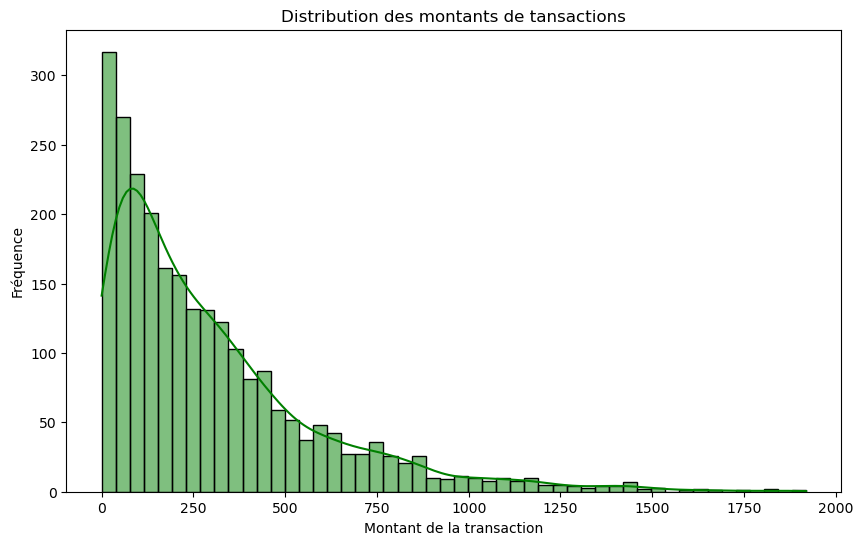

In [18]:
plt.figure(figsize=(10,6))
sns.histplot(df['TransactionAmount'], kde=True, bins=50, color='green')
plt.title("Distribution des montants de tansactions")
plt.xlabel("Montant de la transaction")
plt.ylabel("Fréquence")
#plt.grid(True)
plt.show()

##### Nombre de transactions par localisation 

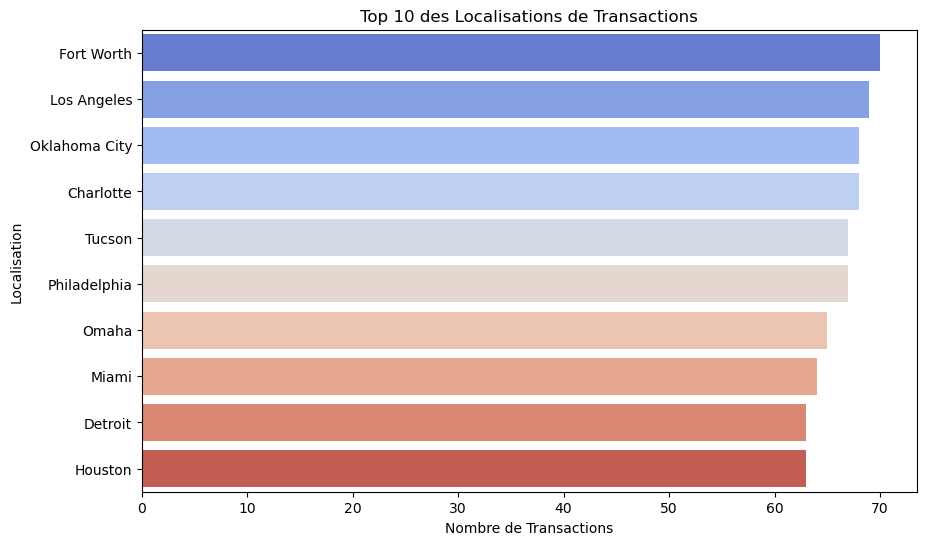

In [21]:
    top_locations = df['Location'].value_counts().head(10)  # Top 10 localisations
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_locations.values, y=top_locations.index, hue=top_locations.index, palette='coolwarm')
    plt.title("Top 10 des Localisations de Transactions")
    plt.xlabel("Nombre de Transactions")
    plt.ylabel("Localisation")
    plt.show()

# Analyse Descriptive


In [24]:
#Statistiques descriptives des variables numériques
print("Statisques descriptives pour les variables numériques :")
print(df.describe())

Statisques descriptives pour les variables numériques :
       TransactionAmount                TransactionDate  CustomerAge  \
count        2512.000000                           2512  2512.000000   
mean          297.593778  2023-07-05 20:32:10.826433024    44.673965   
min             0.260000            2023-01-02 16:00:06    18.000000   
25%            81.885000  2023-04-03 16:22:05.750000128    27.000000   
50%           211.140000     2023-07-07 17:49:43.500000    45.000000   
75%           414.527500     2023-10-06 18:40:53.500000    59.000000   
max          1919.110000            2024-01-01 18:21:50    80.000000   
std           291.946243                            NaN    17.792198   

       TransactionDuration  LoginAttempts  AccountBalance  
count          2512.000000    2512.000000     2512.000000  
mean            119.643312       1.124602     5114.302966  
min              10.000000       1.000000      101.250000  
25%              63.000000       1.000000     1504.3700

In [26]:
# Statistiques descriptives pour les variables catégoriques
print("\nStatistiques descriptives pour les variables catégoriques :")
print(df.describe(include=['object']))


Statistiques descriptives pour les variables catégoriques :
       TransactionID AccountID TransactionType    Location DeviceID  \
count           2512      2512            2512        2512     2512   
unique          2512       495               2          43      681   
top         TX000001   AC00362           Debit  Fort Worth  D000697   
freq               1        12            1944          70        9   

            IP Address MerchantID Channel CustomerOccupation  \
count             2512       2512    2512               2512   
unique             592        100       3                  4   
top     200.136.146.93       M026  Branch            Student   
freq                13         45     868                657   

       PreviousTransactionDate  
count                     2512  
unique                     360  
top        2024-11-04 08:09:17  
freq                        16  


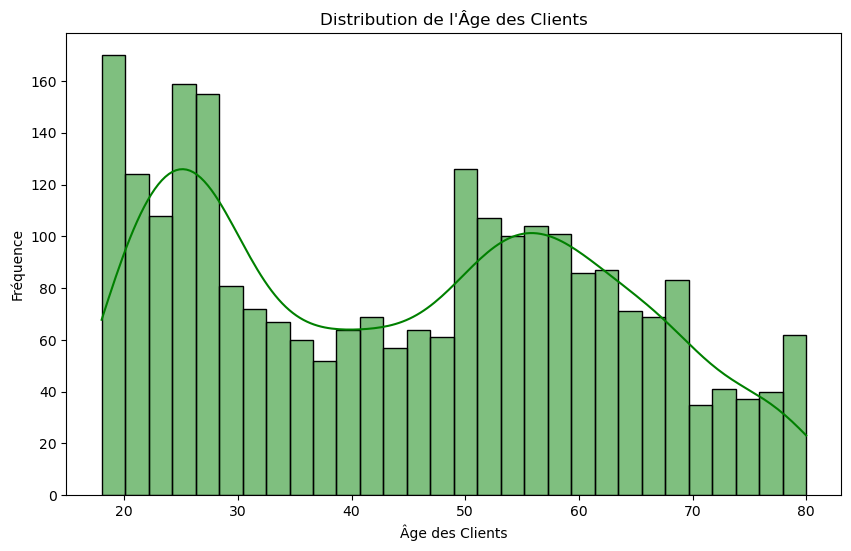

In [28]:
#Distribution de l'âge des clients
plt.figure(figsize=(10,6))
sns.histplot(df['CustomerAge'], kde=True, bins=30, color='green')
plt.title("Distribution de l'Âge des Clients")
plt.xlabel("Âge des Clients")
plt.ylabel("Fréquence")
#plt.grid(True)
plt.show()


Occurrences pour chaque type de transaction :
TransactionType
Debit     1944
Credit     568
Name: count, dtype: int64


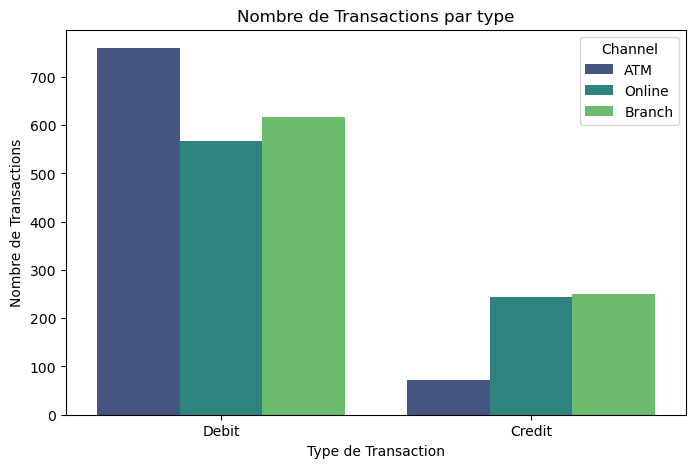

In [30]:
# Comptage des types de transactions
print("\nOccurrences pour chaque type de transaction :")
print( df['TransactionType'].value_counts() )


plt.figure(figsize=(8,5))
sns.countplot(data=df, x='TransactionType', hue='Channel', palette='viridis')
plt.title("Nombre de Transactions par type")
plt.xlabel("Type de Transaction")
plt.ylabel("Nombre de Transactions")
plt.show()

# Analyse des corrélations

In [33]:
# Sélection des colonnes numériques
numerical_columns = df.select_dtypes(include=[np.number])

# Calcul la matrice de corrélation sur les colonnes numériques
correlation_matrix = numerical_columns.corr()

# Affichage la matrice de corrélation
print(correlation_matrix)


                     TransactionAmount  CustomerAge  TransactionDuration  \
TransactionAmount             1.000000    -0.025616             0.004359   
CustomerAge                  -0.025616     1.000000            -0.017936   
TransactionDuration           0.004359    -0.017936             1.000000   
LoginAttempts                -0.008445     0.007653             0.032639   
AccountBalance               -0.025165     0.319942             0.005577   

                     LoginAttempts  AccountBalance  
TransactionAmount        -0.008445       -0.025165  
CustomerAge               0.007653        0.319942  
TransactionDuration       0.032639        0.005577  
LoginAttempts             1.000000        0.014999  
AccountBalance            0.014999        1.000000  


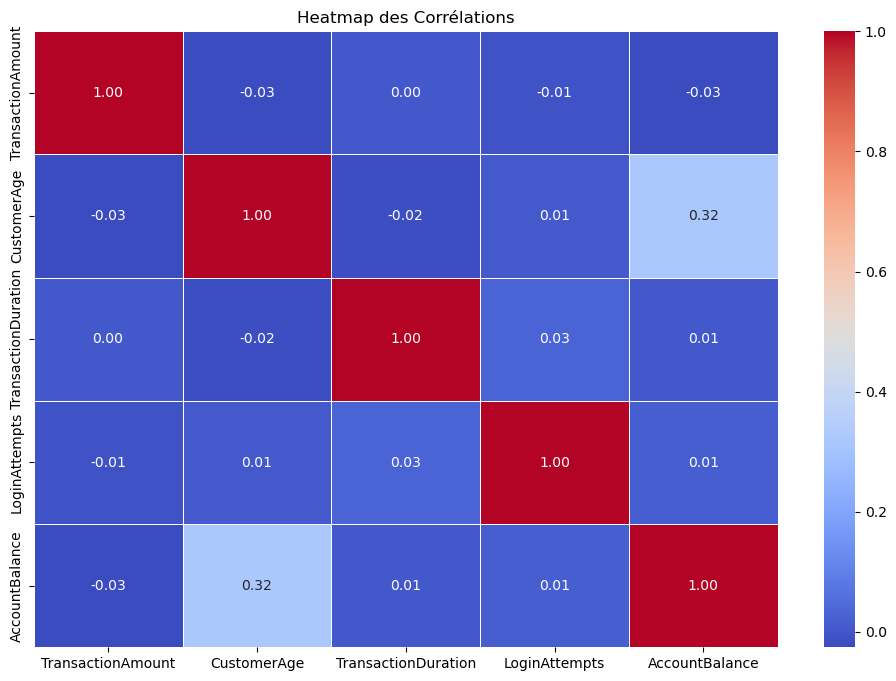

In [35]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap des Corrélations")
plt.show()


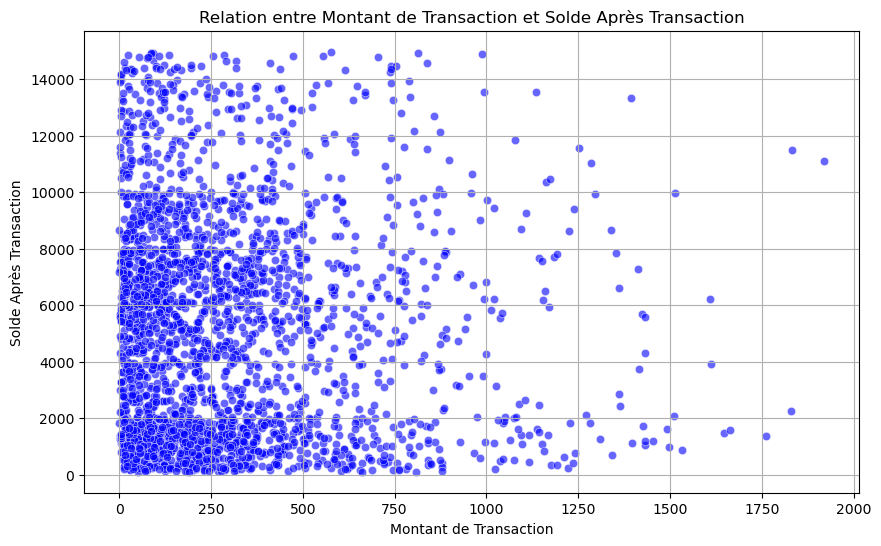

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TransactionAmount', y='AccountBalance', alpha=0.6, color='blue')
plt.title("Relation entre Montant de Transaction et Solde Après Transaction")
plt.xlabel("Montant de Transaction")
plt.ylabel("Solde Après Transaction")
plt.grid(True)
plt.show()


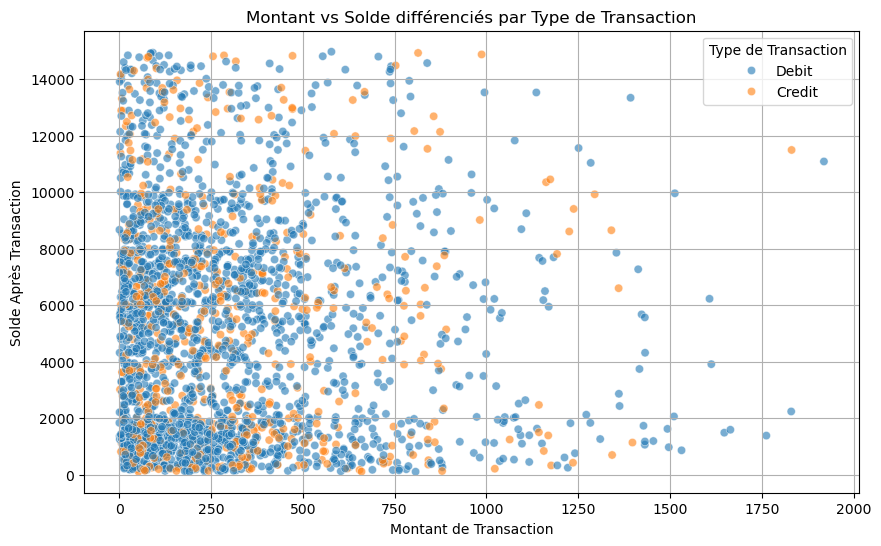

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TransactionAmount', y='AccountBalance', hue='TransactionType', alpha=0.6)
plt.title("Montant vs Solde différenciés par Type de Transaction")
plt.xlabel("Montant de Transaction")
plt.ylabel("Solde Après Transaction")
plt.legend(title="Type de Transaction")
plt.grid(True)
plt.show()
